In [307]:
import sys
sys.path.append('../../../HeaDef/postprocess')
import utility as utl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import scipy
from scipy import signal

# plt.rcParams.update({
#     "text.usetex": True})


In [308]:
dwell10 = pd.read_excel("./10S/10dwell.xltx")
dwell1000 = pd.read_excel("./1000s/1000dwell.xltx")

In [309]:
dwell1000

,t1,d1,l1,t2,d2,l2,t3,d3,l3,t4,...,l7,t8,d8,l8,t9,d9,l9,t10,d10,l10
0,0.000000,503.840588,19.777206,0.000001,505.780771,18.285984,0.000001,508.909875,19.722122,0.000001,...,19.283568,0.000000,509.605831,19.188504,0.000001,510.490645,19.191591,0.000000,509.605831,19.188504
1,0.503695,508.137565,19.777206,0.506416,508.607661,18.285984,0.503148,513.407917,19.722122,0.505365,...,19.283568,0.501759,512.425494,19.188504,0.504019,514.302715,19.191591,0.501759,512.425494,19.188504
2,1.004336,508.568282,19.777206,1.006168,509.284950,18.285984,1.001213,514.976391,19.722122,1.003151,...,19.283568,1.001727,513.874578,19.188504,1.000774,515.471067,19.191591,1.001727,513.874578,19.188504
3,1.501149,509.234950,19.777206,1.503215,509.779548,18.285984,1.501853,516.075328,19.722122,1.505514,...,19.283568,1.504683,515.106597,19.188504,1.503020,516.005085,19.191591,1.504683,515.106597,19.188504
4,2.005429,509.985047,19.777206,2.002871,510.513612,18.285984,2.005187,517.130313,19.722122,2.005857,...,19.283568,2.006739,515.194999,19.188504,2.001534,517.174795,19.191591,2.006739,515.194999,19.188504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,997.499045,573.895823,19.777206,997.502019,573.833015,18.285984,997.504074,533.324743,19.722122,997.504152,...,19.283568,997.503122,574.224163,19.188504,997.501097,541.954032,19.191591,997.503122,574.224163,19.188504
1995,998.003666,574.043529,19.777206,998.001263,574.062886,18.285984,998.000839,533.137617,19.722122,998.001665,...,19.283568,998.000716,574.119365,19.188504,998.002382,541.835712,19.191591,998.000716,574.119365,19.188504
1996,998.500277,574.145223,19.777206,998.501689,574.415561,18.285984,998.499510,533.263948,19.722122,998.501490,...,19.283568,998.501914,574.372520,19.188504,998.501690,540.865155,19.191591,998.501914,574.372520,19.188504
1997,999.004166,574.417897,19.777206,999.004354,574.370635,18.285984,998.999555,533.252611,19.722122,999.001310,...,19.283568,999.004351,574.603830,19.188504,998.999982,541.898640,19.191591,999.004351,574.603830,19.188504


In [310]:
dwell1000['d8 d10'.split()]

,d8,d10
0,509.605831,509.605831
1,512.425494,512.425494
2,513.874578,513.874578
3,515.106597,515.106597
4,515.194999,515.194999
...,...,...
1994,574.224163,574.224163
1995,574.119365,574.119365
1996,574.372520,574.372520
1997,574.603830,574.603830


# timeseries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


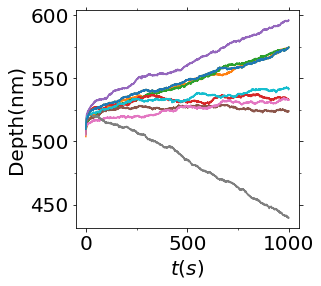

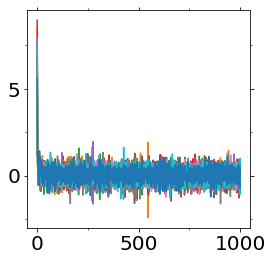

<Figure size 432x288 with 0 Axes>

In [311]:
symbols = utl.Symbols()
legend = utl.Legends()
legend.Set(bbox_to_anchor=(1,1))


data = np.c_[dwell1000]
col = 0
ax = utl.PltErr(None,None,Plot=False)
ax2 = utl.PltErr(None,None,Plot=False)
for i in range(int(data.shape[1]/3)):
    xdata = data[:,col]
    ydata = data[:,col+1]
    load = data[:,col+2]
    ydata2 = np.gradient(ydata,xdata) #--- rate
    #
    rate = np.copy(ydata2) if col == 0 else np.c_[rate,np.copy(ydata2)]
    disp = np.copy(ydata) if col == 0 else np.c_[disp,np.copy(ydata)]
    time = np.copy(xdata) if col == 0 else np.c_[time,np.copy(xdata)]
    col += 3
    utl.PltErr(xdata,ydata,ax=ax,Plot=False,attrs={'fmt':'-','label':'%2.1f N'%load[0]})
    utl.PltErr(xdata,ydata2,ax=ax2,Plot=False,attrs={'fmt':'-'})
utl.PltErr(None,None,
           xstr='$t(s)$',ystr=r'Depth(nm)',
           ax=ax,legend=legend.Get(),
           title='depth_time.png'
          )
utl.PltErr(None,None,
           xstr='$t(s)$',ystr=r'v(nm/s)',
           ax=ax2,
          Plot=False,
           title='rate.png'
#           ylim=(1e-3,1e1), xlim=(400,460),
          )
disp_original = np.copy(disp)
time_original = np.copy(time)

In [312]:
for item in disp.T:
    print(item.shape)

(1999,)
(1999,)
(1999,)
(1999,)
(1999,)
(1999,)
(1999,)
(1999,)
(1999,)
(1999,)


0


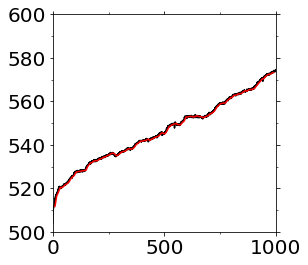

1


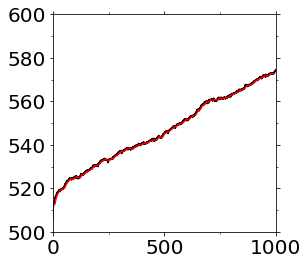

2
3


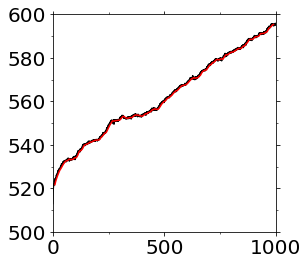

4
5
6
7


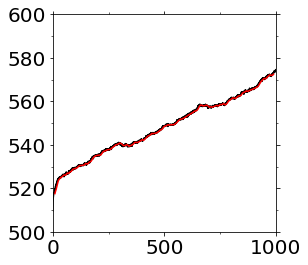

8
9


In [313]:
def mse(s1,s2):
    return np.sum((s1-s2)**2)/s1.shape[0]

def kernelWidth(ydata, fout,output_path):
    n=int(np.log2(ydata.shape[0]))
    widths=np.logspace(1,n,n,base=2,dtype=int)
    widths += 1
    msee=np.zeros(len(widths))
    for width,indx in zip(widths,range(len(msee))):

        #--- filter noise
        data_filtrd = FiltrNoisePeriod(ydata,kernel_width=width)
        n=data_filtrd.shape[0]
        rrange=np.arange(n)
        filtr = np.all([rrange>=width,rrange<n-width],axis=0)

        msee[indx] = mse(ydata[filtr],
            data_filtrd[filtr]
           )

    with open(fout,'w') as fp:
        np.savetxt(fp,np.c_[widths, msee],header='w mse')

    utl.PltErr(widths,msee,xscale='log', #yscale='log',
#            DrawFrame=DRAW_FRAME,
#               title='%s/png/kernelWidth.png'%output_path
              )

def FiltrNoisePeriod(value,kernel_width=1001):
    '''
    filter thermal noise
    '''
    BOX_PTS = kernel_width #1000+1 #int(sys.argv[ 3 ]) #--- kernel width
#        assert BOX_PTS % 2 == 1, 'must be odd!'
#        value = np.array(list(self.loadTimeSeriesOriginal.szz))
    #
    n=len(value)
#    value= np.concatenate([value,np.zeros(n)]) #--- extend
    box_pts=BOX_PTS
    counter = 0 #--- counter
#        box = np.ones(box_pts)
    box = signal.windows.hann(box_pts)
    value_smooth = signal.convolve(value, box, mode='full')/np.sum(box)
#        n=self.loadTimeSeriesOriginal.shape[0]
    return np.array(value_smooth[:n])
        
kernel_width=20    
count=0
for ydata,indx in zip(disp.T,range(len(disp.T))):
    print(indx)
    if indx in [2,4,5,6,8,9]:
#    if indx != 0:
        continue
    #--- filter
    data_filtrd = FiltrNoisePeriod(ydata,kernel_width=kernel_width)

    #--- throw points affected by zero padding
    n=data_filtrd.shape[0]
    rrange=np.arange(n)
    filtr = np.all([rrange>=kernel_width,rrange<n-kernel_width],axis=0)
    data_filtrd = data_filtrd[filtr]
    xdata_filtrd = xdata[filtr]
    ydata2 = np.gradient(data_filtrd,xdata_filtrd) #--- rate

    #--- assign
    rate = np.copy(ydata2) if count == 0 else np.c_[rate,np.copy(ydata2)]
    disp = np.copy(data_filtrd) if count == 0 else np.c_[disp,np.copy(data_filtrd)]
    time = np.copy(xdata_filtrd) if count == 0 else np.c_[time,np.copy(xdata_filtrd)]


    #--- plot
    ax = utl.PltErr(None,None,Plot=False)
    utl.PltErr(xdata,ydata,ax=ax,Plot=False,attrs={'fmt':'-','color':'black'}) #,'label':'%2.1f N'%load[0]})
    utl.PltErr(xdata_filtrd,data_filtrd,ax=ax,Plot=False,attrs={'fmt':'-','color':'red'}) #,'label':'%2.1f N'%load[0]})
    #
    xlo=0
    xhi=1000
    filtr = np.all([xdata_filtrd>=xlo,xdata_filtrd<=xhi],axis=0)
    ylo=data_filtrd[filtr].min()
    yhi=data_filtrd[filtr].max()
    utl.PltErr(None,None,
    #           xstr='$t(s)$',ystr=r'Depth(nm)',
               ax=ax,
               xlim=(xlo,xhi),
               ylim=(500,600),#(ylo,yhi),
    #           title='depth_time.png'
              )
    
    count += 1

14.613609773669987


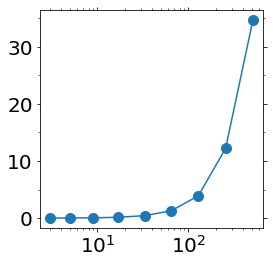

In [299]:
for ydata in [disp.T]:
    print(ydata.std())
#--- mse
    kernelWidth(ydata,fout='mse_w.txt',
                              output_path='.') #--- set your kernel width!


In [300]:
#time = xdata_filtrd
#rate = np.gradient(data_filtrd,xdata_filtrd) #--- rate


In [301]:
time

array([ 10.010785,  10.510798,  11.006119, ..., 988.498139, 988.994964,
       989.499058])

<AxesSubplot:>

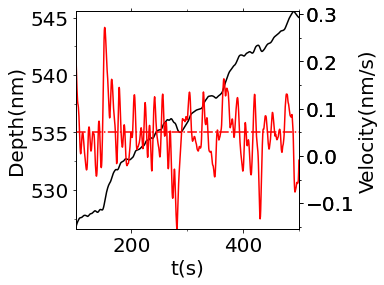

In [314]:
indx=0
xdata_filtrd = time[:,indx]
data_filtrd = disp[:,indx]
ydiff = rate[:,indx]

ax = utl.PltErr(None,None,Plot=False)

xlo=100#100
xhi=500#400
filtr = np.all([xdata_filtrd>=xlo,xdata_filtrd<=xhi],axis=0)
#
ylo=data_filtrd[filtr].min()
yhi=data_filtrd[filtr].max()
utl.PltErr(xdata_filtrd,data_filtrd,ax=ax,
           Plot=False,
          ystr=r'Depth(nm)',xstr='t(s)',
            xlim=(xlo,xhi),ylim=(ylo,yhi),
           attrs={'fmt':'-','color':'black'}) #,'label':'%2.1f N'%load[0]})
#---
flo=rate[filtr].min()
fhi=rate[filtr].max()
utl.PltErr(xdata_filtrd,ydiff,
           ax=ax,Plot=False,
            xlim=(xlo,xhi),ylim=(flo,fhi),
            ystr=r'Velocity(nm/s)',
           attrs={'fmt':'-','color':'red'},twinx=True) #,'label':'%2.1f N'%load[0]})
#
ymed = np.median(rate[filtr])
utl.PltErr([xlo,xhi],[ymed,ymed],
            xlim=(xlo,xhi),ylim=(flo,fhi),
          ax=ax,Plot=False,
          twinx=True,dpi=300,
         attrs={'fmt':'-.','color':'red'},
           title='depth_rate_time.png'
         )
#
# utl.PltErr(None,None,
#           ax=ax, Plot=False,
#            xlim=(xlo,xhi),
#            ylim=(ylo,yhi),
#           title='depth_time.png'
#          )

<AxesSubplot:xlabel='t(s)', ylabel='Depth(nm)'>

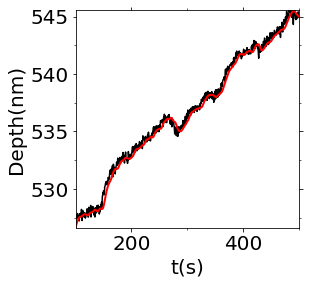

In [315]:
indx=0
# xdata_filtrd = time[:,indx]
# data_filtrd = disp[:,indx]
# ydiff = rate[:,indx]

ax = utl.PltErr(None,None,Plot=False)

xlo=100#100
xhi=500#400
filtr = np.all([xdata_filtrd>=xlo,xdata_filtrd<=xhi],axis=0)
#
ylo=data_filtrd[filtr].min()
yhi=data_filtrd[filtr].max()
#---
utl.PltErr(time_original[:,indx],disp_original[:,indx],
           ax=ax,Plot=False,
#            xlim=(xlo,xhi),ylim=(flo,fhi),
#            ystr=r'Velocity(nm/s)',
           attrs={'fmt':'-','color':'black'}) #,'label':'%2.1f N'%load[0]})
#
utl.PltErr(xdata_filtrd,data_filtrd,ax=ax,
           Plot=False, dpi=300,
          ystr=r'Depth(nm)',xstr='t(s)',
            xlim=(xlo,xhi),ylim=(ylo,yhi),
                      title='depth_time_smooth.png',

           attrs={'fmt':'-','color':'red','lw':2}) #,'label':'%2.1f N'%load[0]})

#ymed = np.median(rate[filtr])


# avalanche

In [316]:
def GetAvl( x, y, lambdc ):
    n = len(x)
    i = 0
    smat = [[],[],[]]
    try:
        while True:
            while y[i] < lambdc:
                i += 1
            assert y[i] >= lambdc
            #--- avalanche starts
            dur = 0
#            size = 0.0 #y[i]
            start = x[i]
            start_indx = i
            while y[i]>=lambdc: #-x[i] == 1:
                dur += 1
#                size += (y[i]-lambdc)
                i += 1
            #--- avalanche ends
            assert y[i] < lambdc
            end = x[i] #x[i-1 if i-1 >= 0 else 0]
            end_indx = i #i-1 if i-1>= 0 else 0
            #--- size
            sub_x = x[start_indx:end_indx+1]
            sub_y = y[start_indx:end_indx+1]
            size = np.sum((sub_x[1:]-sub_x[:-1])*sub_y[:-1])
#            print start, end, size
            #--- find epicenter
            smat = np.c_[smat,[start, end, size]]
    except:
#        traceback.print_exc()
        pass

    assert smat.shape[1] > 0, 'Lower lambdc! lambdc='%lambdc
    df_avl = pd.DataFrame(smat.T,columns=['ti','tf','size'])
    df_avl=df_avl[df_avl['size']>0]
    return df_avl

def Wrapper_GetAvl(value,time,tlo,thi,lambdc):
    '''
    return avalanche sizes given force timeseries and initial and final times
    '''
    
    
    #--- data frame storing avalanche attributes
    filtr = np.all([time>tlo,time<thi],axis=0)
    lambdc = np.median(value[filtr])
    print('lambdc=',lambdc)

    df_avl = GetAvl( time[filtr], value[filtr], lambdc)
    return np.array(df_avl['size'].to_list())

tlo = 100
thi = 1e4
lambdc = 0.0 #--- threshold
try:
#    sizes = np.concatenate(list(map(lambda x:Wrapper_GetAvl(x[0],x[1],tlo,thi,lambdc), zip(rate.T,time.T))))
    sizes = list(map(lambda x:Wrapper_GetAvl(x[0],x[1],tlo,thi,lambdc), zip(rate.T,time.T)))
except:
    traceback.print_exc()
    print('increase the threshold')

lambdc= 0.04739164553302544
lambdc= 0.05596675626622982
lambdc= 0.06295835743048883
lambdc= 0.05232391823187754


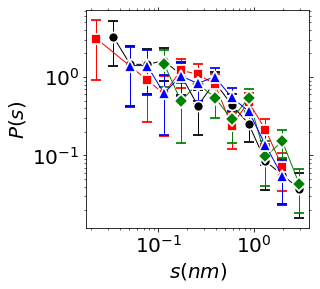

<AxesSubplot:xlabel='$s(nm)$', ylabel='$P(s)$'>

In [317]:
symbols = utl.Symbols()
legend = utl.Legends()
legend.Set(bbox_to_anchor=(1,1))

ax = utl.PltErr(None,None,Plot=False)
for item, count in zip(sizes,range(len(sizes))):
#    if count >0 : continue
    hist, edge, err = utl.GetPDF(item, n_per_decade=6, linscale=None)

    utl.PltErr(edge, hist, yerr=err,
               ax=ax, Plot=False,
              attrs=symbols.GetAttrs(count=count%7,label=count)
              )
utl.PltErr(None,None,
    #           xlim=(1e-3,1e1),
    #            ylim=(1e-2,1e2),
               ystr='$P(s)$',
               xstr='$s(nm)$',
               xscale = 'log',
               yscale='log',
           ax=ax,
#           legend=legend.Get(),
           title='ps.png'
              )

lambdc= -0.025962866566351293
lambdc= -0.029093988293607254
lambdc= -0.01576355920331025
lambdc= -0.03755551751837629
lambdc= 0.010015828487667022
lambdc= 0.013325417947839924
lambdc= 0.01843530774544888
lambdc= 0.01186621053801673
lambdc= 0.04739164553302544
lambdc= 0.05596675626622982
lambdc= 0.06295835743048883
lambdc= 0.05232391823187754


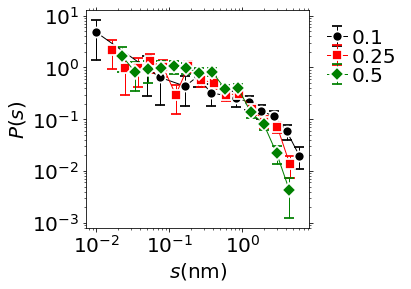

In [328]:
def GetAvl( x, y, lambdc ):
    n = len(x)
    i = 0
    smat = [[],[],[]]
    try:
        while True:
            while y[i] < lambdc:
                i += 1
            assert y[i] >= lambdc
            #--- avalanche starts
            dur = 0
#            size = 0.0 #y[i]
            start = x[i]
            start_indx = i
            while y[i]>=lambdc: #-x[i] == 1:
                dur += 1
#                size += (y[i]-lambdc)
                i += 1
            #--- avalanche ends
            assert y[i] < lambdc
            end = x[i] #x[i-1 if i-1 >= 0 else 0]
            end_indx = i #i-1 if i-1>= 0 else 0
            #--- size
            sub_x = x[start_indx:end_indx+1]
            sub_y = y[start_indx:end_indx+1]
            size = np.sum((sub_x[1:]-sub_x[:-1])*sub_y[:-1])
#            print start, end, size
            #--- find epicenter
            smat = np.c_[smat,[start, end, size]]
    except:
#        traceback.print_exc()
        pass

    assert smat.shape[1] > 0, 'Lower lambdc! lambdc='%lambdc
    df_avl = pd.DataFrame(smat.T,columns=['ti','tf','size'])
    df_avl=df_avl[df_avl['size']>0]
    return df_avl

def Wrapper_GetAvl(value,time,tlo,thi,lambdc):
    '''
    return avalanche sizes given force timeseries and initial and final times
    '''
    
    
    #--- data frame storing avalanche attributes
    filtr = np.all([time>tlo,time<thi],axis=0)
    lambdc = np.quantile(value[filtr],lambdc)
    print('lambdc=',lambdc)

    df_avl = GetAvl( time[filtr], value[filtr], lambdc)
    return np.array(df_avl['size'].to_list())

ax=utl.PltErr(None,None,Plot=False)
tlo = 100
thi = 1e4
for lambdc,count in zip([0.1,0.25,0.5],range(100)): #--- threshold
    try:
    #    sizes = np.concatenate(list(map(lambda x:Wrapper_GetAvl(x[0],x[1],tlo,thi,lambdc), zip(rate.T,time.T))))
        sizes = list(map(lambda x:Wrapper_GetAvl(x[0],x[1],tlo,thi,lambdc=lambdc), zip(rate.T,time.T)))
    except:
        traceback.print_exc()
        print('increase the threshold')

    hist, edge, err = utl.GetPDF(np.concatenate(sizes), n_per_decade=6, linscale=None)

    utl.PltErr(edge, hist, yerr=err,
               Plot=False,
              attrs=symbols.GetAttrs(count=count%7,label=lambdc),
                   ystr='$P(s)$',
                   xstr='$s$(nm)',
                   xscale = 'log',
                   yscale='log',
               ax=ax,
               legend=legend.Get(),
               title='ps.png'
                  )

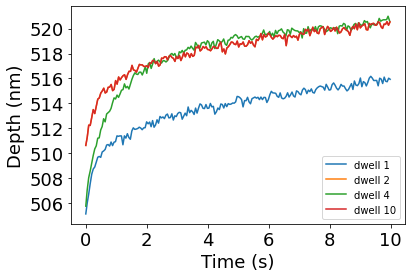

In [12]:
num = [1,2,3,4,5,6,7,8,9,10]
for i in range (10):
    if i==0 or i==1 or i==3 or i==9:
        plt.plot(dwell10["t%d"%(i+1)], dwell10["d%d"%(i+1)], label="dwell %d"%(num[i]))
        
    
plt.xlabel("Time (s)", fontdict={"fontsize": 18})
plt.ylabel("Depth (nm)", fontdict={"fontsize": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend()

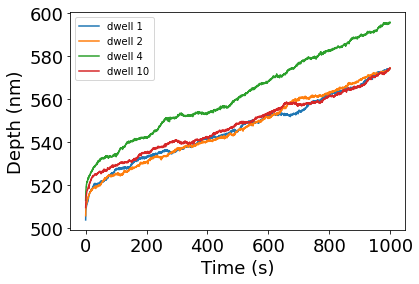

In [13]:
for i in range (10):
    if i==0 or i==1 or i==3 or i==9:
        plt.plot(dwell1000["t%d"%(i+1)], dwell1000["d%d"%(i+1)], label="dwell %d"%(num[i]))
        
    
plt.xlabel("Time (s)", fontdict={"fontsize": 18})
plt.ylabel("Depth (nm)", fontdict={"fontsize": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend()

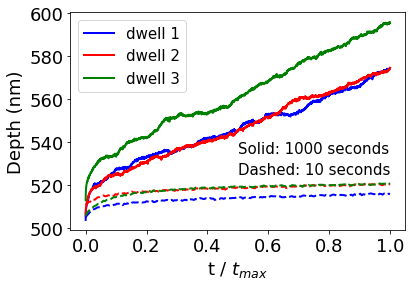

In [14]:
# for i in range (10):
#     if i==0 or i==1 or i==3 or i==9:
plt.plot(dwell1000["t1"]/dwell1000["t1"][1998], dwell1000["d1"], label="dwell 1", color="blue", linewidth=2)
plt.plot(dwell1000["t2"]/dwell1000["t2"][1998], dwell1000["d2"], label="dwell 2", color="red", linewidth=2)
plt.plot(dwell1000["t4"]/dwell1000["t4"][1998], dwell1000["d4"], label="dwell 3", color="green", linewidth=2)
#plt.plot(dwell1000["t10"]/dwell1000["t10"][1998], dwell1000["d10"], label="dwell 4", color="purple", linewidth=2)


plt.plot(dwell10["t1"]/dwell10["t1"][205], dwell10["d1"], color="blue", linestyle="dashed", linewidth=2)
plt.plot(dwell10["t2"]/dwell10["t2"][205], dwell10["d2"], color="red", linestyle="dashed", linewidth=2)
plt.plot(dwell10["t4"]/dwell10["t4"][205], dwell10["d4"], color="green", linestyle="dashed", linewidth=2)
#plt.plot(dwell10["t10"]/dwell10["t10"][205], dwell10["d10"], color="purple", linestyle="dashed", linewidth=2)

    
plt.xlabel(r"t / $t_{max}$", fontdict={"fontsize": 18})
plt.ylabel("Depth (nm)", fontdict={"fontsize": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.text(0.5, 535, "Solid: 1000 seconds", fontsize=15)
plt.text(0.5, 525, "Dashed: 10 seconds", fontsize=15)
plt.legend(fontsize=15)

plt.savefig("dwell_exp.png", bbox_inches='tight', dpi=300)

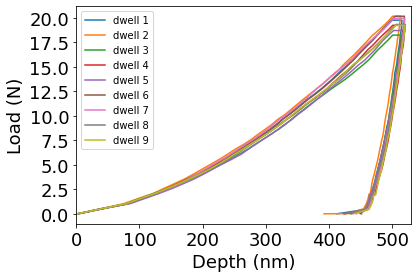

In [15]:
ld10 = pd.read_excel("./10S/ld.xltx")

for i in range (9):
    #if i!=6:
        plt.plot(ld10["d%d"%(i+1)], ld10["l%d"%(i+1)], label="dwell %d"%(i+1))
        
    
plt.xlabel("Depth (nm)", fontdict={"fontsize": 18})
plt.ylabel("Load (N)", fontdict={"fontsize": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.plot( ld10["d1"],ld10["l1"])
plt.xlim(0,530)
plt.legend()

In [16]:
ld10

,w1,d1,l1,w2,d2,l2,w3,d3,l3,w4,...,l6,w7,d7,l7,w8,d8,l8,w9,d9,l9
0,0.0,-392.714001,-0.011549,0.000000,-428.664574,-0.012448,0.0,-362.513568,-0.011586,0.0,...,-0.012451,0.000000,-388.743273,-0.011548,0.0,-384.548394,-0.011588,0.0,-370.077590,-0.011533
1,0.0,-359.451549,-0.010662,0.000000,-388.794050,-0.011551,0.0,-327.715442,-0.010701,0.0,...,-0.011563,0.000000,-354.854055,-0.010652,0.0,-349.322630,-0.010698,0.0,-329.959482,-0.010648
2,0.0,-320.379916,-0.009771,0.000000,-350.658292,-0.010665,0.0,-292.660137,-0.009806,0.0,...,-0.010668,0.000000,-318.913867,-0.009769,0.0,-315.469274,-0.009796,0.0,-292.101698,-0.009757
3,0.0,-281.223215,-0.008883,0.000000,-313.206442,-0.009763,0.0,-257.395954,-0.008927,0.0,...,-0.009779,0.000000,-276.672236,-0.008876,0.0,-280.210154,-0.008909,0.0,-259.539177,-0.008871
4,0.0,-241.704836,-0.008002,0.000000,-276.191196,-0.008873,0.0,-224.253148,-0.008028,0.0,...,-0.008887,0.000000,-234.034522,-0.007984,0.0,-243.635087,-0.008003,0.0,-226.744432,-0.007983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,NaN,NaN,NaN,74.334067,461.780501,1.512469,NaN,NaN,NaN,NaN,...,0.034918,74.454752,443.532425,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,74.383636,458.946992,1.017929,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,74.433787,454.993109,0.518549,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,74.483386,429.897216,0.019079,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


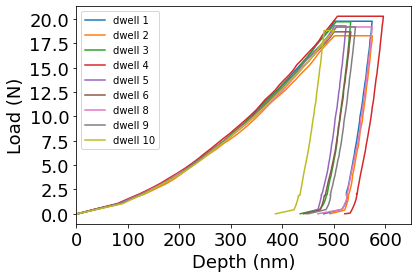

In [17]:
ld1000 = pd.read_excel("./1000s/ld.xltx")

for i in range (10):
    if i!=6 :
        plt.plot(ld1000["d%d"%(i+1)], ld1000["l%d"%(i+1)], label="dwell %d"%(i+1))
        
    
plt.xlabel("Depth (nm)", fontdict={"fontsize": 18})
plt.ylabel("Load (N)", fontdict={"fontsize": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.plot( ld10["d1"],ld10["l1"])
plt.xlim(0,650)
plt.legend()

(0.0, 650.0)

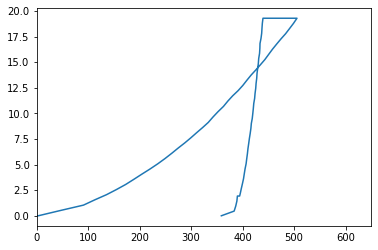

In [18]:
plt.plot(ld1000["d7"], ld1000["l7"], label="dwell %d"%(i+1))
plt.xlim(0,650)
